**Upload data to google collab**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ca-GrQc.txt to ca-GrQc.txt


**Lire le fichier et créer le graphe**

In [2]:
import pandas as pd
import networkx as nx

# Lire le fichier
df = pd.read_csv('ca-GrQc.txt', sep='\t', comment='#', header=None, names=['FromNodeId', 'ToNodeId'])

print(df.head())

# Créer un graphe NON orienté
G = nx.from_pandas_edgelist(df, source='FromNodeId', target='ToNodeId', create_using=nx.Graph())

print(f"Nombre de noeuds : {G.number_of_nodes()}")
print(f"Nombre d'arêtes : {G.number_of_edges()}")


   FromNodeId  ToNodeId
0        3466       937
1        3466      5233
2        3466      8579
3        3466     10310
4        3466     15931
Nombre de noeuds : 5242
Nombre d'arêtes : 14496


**Analyse de la distribution des degrés**

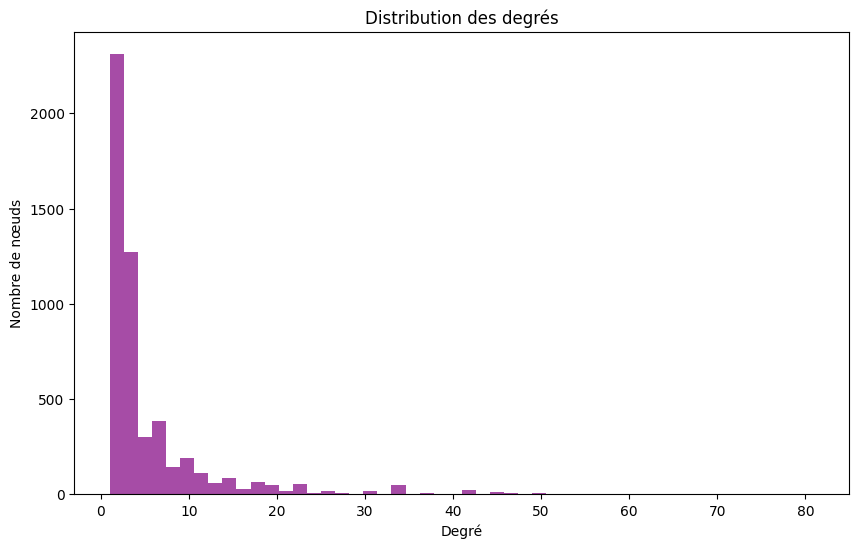

Degré moyen : 5.530713468141931
Max degré : 81


In [15]:
import matplotlib.pyplot as plt

# Calcul degré
degrees = dict(G.degree())

# Histogramme degrés
plt.figure(figsize=(10,6))
plt.hist(degrees.values(), bins=50, color='purple', alpha=0.7)
plt.title("Distribution des degrés")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.show()

# Afficher quelques stats
print("Degré moyen :", sum(degrees.values())/len(degrees))
print("Max degré :", max(degrees.values()))


**Analyse des composants connectés**:

Pour un graphe orienté, il y a deux types de composants :
*  Fortement connexes (strongly connected components) : chaque nœud accessible depuis chaque autre.
*  Faiblement connexes (weakly connected components) : mêmes composants en ignorant la direction.



In [17]:
# Trouver les composants connectés
components = list(nx.connected_components(G))

# Nombre de composants
print("Nombre de composantes connectées :", len(components))

# Taille de la plus grande composante
largest_component = max(components, key=len)
print("Taille de la plus grande composante :", len(largest_component))

# Extraire la plus grande composante sous forme de graphe
G_largest = G.subgraph(largest_component).copy()


Nombre de composantes connectées : 355
Taille de la plus grande composante : 4158


**Analyse des chemins**

In [18]:
# Analyse sur la plus grande composante
if nx.is_connected(G):
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)
else:
    avg_shortest_path_length = nx.average_shortest_path_length(G_largest)
    diameter = nx.diameter(G_largest)

print("Longueur moyenne des plus courts chemins :", avg_shortest_path_length)
print("Diamètre du graphe :", diameter)


Longueur moyenne des plus courts chemins : 6.049380016182999
Diamètre du graphe : 17


**Coefficient de clustering et analyse de la densité**

In [19]:
# Coefficient de clustering moyen
clustering_coeff = nx.average_clustering(G)
print("Coefficient de clustering moyen :", clustering_coeff)

# Densité du graphe
density = nx.density(G)
print("Densité du graphe :", density)


Coefficient de clustering moyen : 0.529635811052136
Densité du graphe : 0.001055278280507905


**Analyse de la centralité:
Centralité de degré
Centralité d'intermédiarité (betweenness)
Centralité de proximité**

In [20]:
degree_centrality = nx.degree_centrality(G)
print("Top 5 noeuds par centralité de degré :", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 noeuds par centralité de degré : [(21012, 0.015455065827132226), (21281, 0.01507345926349933), (22691, 0.014691852699866437), (12365, 0.014691852699866437), (6610, 0.012974623163518412)]


In [21]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Top 5 noeuds par centralité d'intermédiarité :", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 noeuds par centralité d'intermédiarité : [(13801, 0.037027150433897676), (9572, 0.025689005573850524), (14599, 0.025488418054511023), (7689, 0.024970551728636943), (13929, 0.02465268472568471)]


In [22]:
closeness_centrality = nx.closeness_centrality(G)
print("Top 5 noeuds par centralité de proximité :", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 noeuds par centralité de proximité : [(13801, 0.19428463503141283), (14485, 0.18953808583111678), (9572, 0.18903821471838708), (17655, 0.18896237842386998), (2654, 0.18712852106232164)]


In [3]:
!pip install cdlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 92.4 MB/s eta 0:00:00


In [4]:
from cdlib import algorithms, evaluation

# Algorithme Louvain
communities_louvain = algorithms.louvain(G)

# Algorithme Propagation des labels
communities_lp = algorithms.label_propagation(G)

# Algorithme K-clique (ici k=3 par exemple)
communities_kclique = algorithms.kclique(G, k=3)

# Évaluer la modularité
mod_louvain = evaluation.newman_girvan_modularity(G, communities_louvain)
mod_lp = evaluation.newman_girvan_modularity(G, communities_lp)
mod_kclique = evaluation.newman_girvan_modularity(G, communities_kclique)

print(f"Modularité Louvain: {mod_louvain.score}")
print(f"Modularité Label Propagation: {mod_lp.score}")
print(f"Modularité K-Clique: {mod_kclique.score}")

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg'}
Modularité Louvain: 0.8614188171228686
Modularité Label Propagation: 0.7442160506750036
Modularité K-Clique: 0.46630574794706225


**Explorer et interpréter**

In [5]:
def print_community_sizes(communities, name):
    sizes = [len(c) for c in communities.communities]
    print(f"{name} : taille max = {max(sizes)}, moyenne = {sum(sizes)/len(sizes):.2f}, nombre = {len(sizes)}")

print_community_sizes(communities_louvain, "Louvain")
print_community_sizes(communities_lp, "Label Propagation")
print_community_sizes(communities_kclique, "K-Clique")


Louvain : taille max = 245, moyenne = 13.30, nombre = 394
Label Propagation : taille max = 153, moyenne = 5.15, nombre = 1018
K-Clique : taille max = 952, moyenne = 5.80, nombre = 835


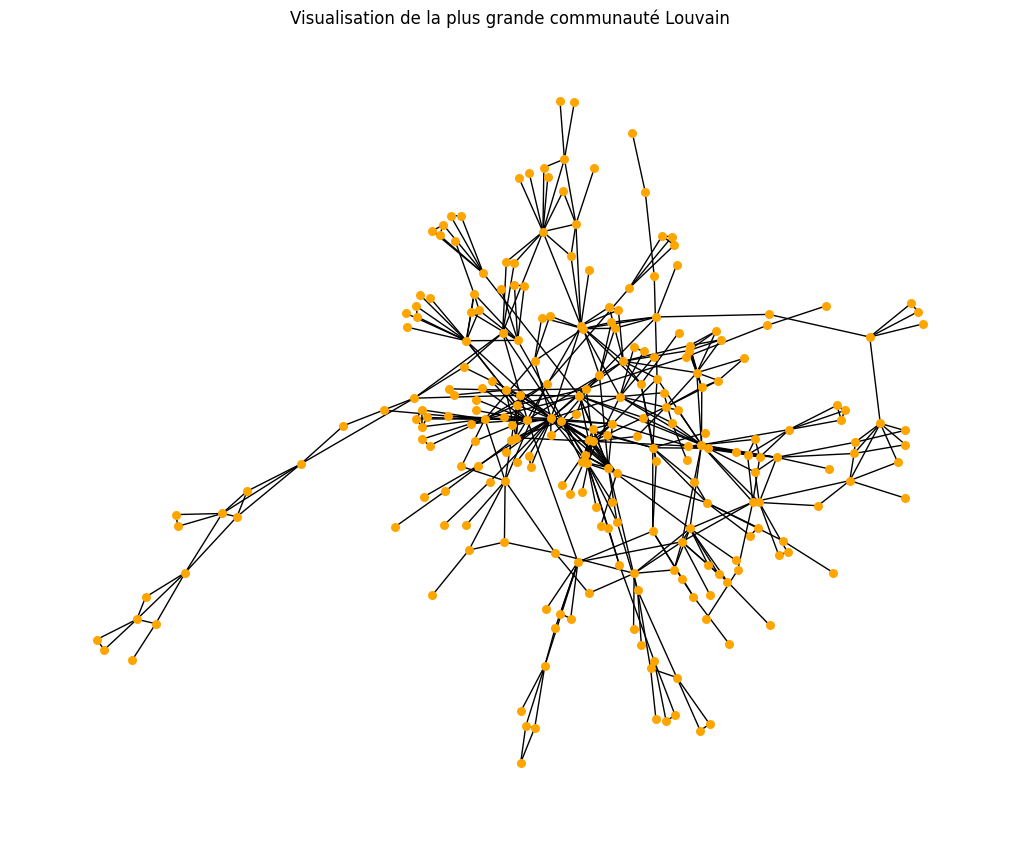

In [25]:
import matplotlib.pyplot as plt

# Par exemple visualiser la plus grande communauté Louvain
largest_community = max(communities_louvain.communities, key=len)
subG = G.subgraph(largest_community)

plt.figure(figsize=(10, 8))
nx.draw(subG, node_size=30, node_color='orange', with_labels=False)
plt.title("Visualisation de la plus grande communauté Louvain")
plt.show()
